# Q1

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


In [8]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(url,'lxml')

In [10]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [12]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [14]:
df['Borough'].replace('Not assigned', np.nan, inplace=True)
df.dropna(subset=['Borough'], inplace=True)

df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [17]:
df_n = df.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_n.columns = ['PostalCode', 'Borough', 'Neighborhood']
df_n

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [18]:
df_n['Neighborhood'].replace('Not assigned', "Queen's Park", inplace=True)
df_n

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [19]:
df_n.shape

(103, 3)

# Q2

In [22]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)

In [23]:
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [31]:
# Renaming the columns
geospatial_data.columns = ['PostalCode', 'Latitude', 'Longitude']

In [32]:
geospatial_data.columns

Index(['PostalCode', 'Latitude', 'Longitude'], dtype='object')

In [34]:
#Merging dataframes
merged_data = pd.merge(df_n, geospatial_data, on='PostalCode')

# Q3

In [35]:
merged_data['Coordinates'] = list(zip(merged_data['Latitude'], merged_data['Longitude']))

In [36]:
merged_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Coordinates
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,"(43.806686299999996, -79.19435340000001)"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,"(43.7845351, -79.16049709999999)"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,"(43.7635726, -79.1887115)"
3,M1G,Scarborough,Woburn,43.770992,-79.216917,"(43.7709921, -79.21691740000001)"
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,"(43.773136, -79.23947609999999)"


In [48]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [44]:
import geopandas as gpd

In [39]:
merged_data['Coordinates'] = merged_data['Coordinates'].apply(Point)

In [45]:
gdf = gpd.GeoDataFrame(merged_data, geometry='Coordinates')

In [46]:
gdf.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Coordinates
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,POINT (43.80669 -79.19435)
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,POINT (43.78454 -79.16050)
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,POINT (43.76357 -79.18871)
3,M1G,Scarborough,Woburn,43.770992,-79.216917,POINT (43.77099 -79.21692)
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,POINT (43.77314 -79.23948)


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


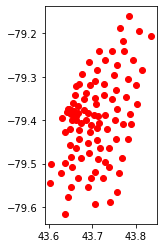

In [49]:
# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='green', edgecolor='black')
# plot and show
gdf.plot(ax=ax, color='red')

plt.show()